In [330]:
#from google.colab import drive
#drive.mount('/content/drive')

In [331]:
#!pip install wfdb


In [332]:
import numpy as np, os, sys
from scipy.io import loadmat
import wfdb
import matplotlib.pyplot as pp
import pandas as pd
import csv

In [333]:
def writetocsv(PATIENTSDATA,output_dir,csvfilename):
    #cols=['ptID','Num_Leads','Sample_Fs','Lead_Name_1','Gain_Lead_1','Lead_Name_2','Gain_Lead_2','Lead_Name_3','Gain_Lead_3','Lead_Name_4','Gain_Lead_4','Lead_Name_5','Gain_Lead_5','Lead_Name_6','Gain_Lead_6','Lead_Name_7','Gain_Lead_7','Lead_Name_8','Gain_Lead_8','Lead_Name_9','Gain_Lead_9','Lead_Name_10','Gain_Lead_10','Lead_Name_11','Gain_Lead_11','Lead_Name_12','Gain_Lead_12','Age','Sex','SNOMED_Label_ID','Label_Name','Label_Abbvreviated']
    
    #ptDATA_Df= pd.DataFrame(PATIENTSDATA, columns=cols).T
    
    
    with open(output_dir+"/../CSV/"+"/"+csvfilename,'a') as f1:
        writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
        writer.writerow(PATIENTSDATA)
    f1.close()

In [334]:
def returnlistofcsvfile(output_dir,csvfilename):
    savingto=output_dir+"/../CSV/"+"/"+csvfilename
    filelist=list()
    
    if not os.path.exists(savingto):
        return ""
    else:
        with open(savingto,'r') as f1:
            reader = csv.reader(f1, delimiter=',')
            included_cols = [1]
            for row in reader:
                if not str(row[0]) =="ptID":
                    filelist.append(str(row[0])+".mat")
        f1.close()
        return filelist

In [335]:
def writeheadertocsvonce(output_dir, csvfilename):
    cols=['ptID','Num_Leads','Sample_Fs','Lead_Name_1','Gain_Lead_1','Lead_Name_2','Gain_Lead_2','Lead_Name_3','Gain_Lead_3','Lead_Name_4','Gain_Lead_4','Lead_Name_5','Gain_Lead_5','Lead_Name_6','Gain_Lead_6','Lead_Name_7','Gain_Lead_7','Lead_Name_8','Gain_Lead_8','Lead_Name_9','Gain_Lead_9','Lead_Name_10','Gain_Lead_10','Lead_Name_11','Gain_Lead_11','Lead_Name_12','Gain_Lead_12','Age','Sex','Length_ECG','SNOMED_Label_ID','Label_Name','Label_Abbvreviated']
    savingto= output_dir+"/../CSV/"+"/"+csvfilename
    if not os.path.exists(savingto):
        with open(savingto,'w') as f1:
            writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
            writer.writerow(cols)
        f1.close()

In [336]:
def makealldirectoriesatonce(output_directory,actual_labels,classes,csvfilename):
    lead_names=['I','II','III','aVR','aVL','aVF','V1', 'V2', 'V3', 'V4','V5','V6']
    tmp_class_names=list(actual_labels.values())
    
    #print(tmp_class_names)
    #print(actual_labels)
    if not os.path.isdir(output_directory):
        os.mkdir(output_directory)
    if not os.path.isdir(output_directory +"/../CSV"):
        os.mkdir(output_directory+"/../CSV")
    
    
    writeheadertocsvonce(output_directory,csvfilename)
    
    for i in range(len(lead_names)):
        if not os.path.isdir(output_directory+"/"+str(lead_names[i])):
            os.mkdir(output_directory+"/"+str(lead_names[i]))
            for ii in range(len(tmp_class_names)):
                if not os.path.isdir(output_directory+"/"+str(lead_names[i])+"/"+str(tmp_class_names[ii])):
                    os.mkdir(output_directory+"/"+str(lead_names[i])+"/"+str(tmp_class_names[ii]))


In [337]:
def drawandsavefig(PTDETAILSDATA, data, output_directory):
    leads=list()
    ptID=str(PTDETAILSDATA[0])
    num_leads=int(PTDETAILSDATA[1])
    for i in range(num_leads):
        
        leads.append(PTDETAILSDATA[2*i+3])
        newdir=output_directory+"/"+ str(leads[i])+"/"+str(PTDETAILSDATA[-1])
        savingto=newdir+"/"+ptID+"_"+str(leads[i])+".jpg"
        if not os.path.exists(savingto):
            x=pp.figure(num=None, figsize=(4, 4), dpi=300, facecolor='w', edgecolor='k')
            pp.axis('off')
            pp.grid(False)
            
            #print("Length: "+ str(len(data[i])))
            pp.plot(data[i][:2000], "k")
            pp.savefig(savingto,dpi=300)
            #print("Saved to: "+ savingto)
            pp.close(x)
        #pp.show()
        

In [338]:
def load_data(filename):
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)

    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)

    with open(input_header_file,'r') as f:
        header_data=f.readlines()
    return data, header_data

In [339]:
def getactuallabels(classes):
    dictclasses={'164884008':'Premature Ventricular Complexes', '164889003':'Atrial Fibrillation', '164909002':'Left Bundle Branch Block', '164931005':'ST Elevation', '270492004':'1st Degree AV Block', '284470004':'Premature Atrial Contraction', '426783006':'Sinus Rhythm', '429622005':'ST Depression', '59118001':'Right Bundle Branch Block'}
    dictclasses_abrevated={'164884008':'PVC', '164889003':'AF', '164909002':'LBBB', '164931005':'STE', '270492004':'IAVB', '284470004':'PAC', '426783006':'SNR', '429622005':'STD', '59118001':'RBBB'}
    '''for label in classes:
        #print(label)
        print(dictclasses_abrevated[str(label)] + " : " + dictclasses[str(label)])
    '''
    return dictclasses, dictclasses_abrevated

In [340]:
def get_classes(input_directory,files):
    classes=set()
    for f in files:
        g = f.replace('.mat','.hea')
        input_file = os.path.join(input_directory,g)
        with open(input_file,'r') as f:
            for lines in f:
                if lines.startswith('#Dx'):
                    tmp = lines.split(': ')[1].split(',')
                    for c in tmp:
                        classes.add(c.strip())
    return sorted(classes)

In [341]:
def get_12ECG_features(tmp_input_file, data, header_data):

    ptDetails=list()
    gainLeadDetails=list()
    
    tmp_hea = header_data[0].split(' ')
    
    ptID = tmp_hea[0]
    ptDetails.append(ptID)
    num_leads = int(tmp_hea[1])
    ptDetails.append(num_leads)
    sample_Fs= int(tmp_hea[2])
    ptDetails.append(sample_Fs)
    
    
    gain_lead = np.zeros(num_leads)
    #ptDetails.append(gain_lead)
    for ii in range(num_leads):
        tmp_hea = header_data[ii+1].split(' ')
        gain_lead[ii] = int(tmp_hea[2].split('/')[0])
        lead_no= str(tmp_hea[8]).strip()
        ptDetails.append(lead_no)
        ptDetails.append(gain_lead[ii])
        
    # for testing, we included the mean age of 57 if the age is a NaN
    # This value will change as more data is being released
    for iline in header_data:
        if iline.startswith('#Age'):
            tmp_age = iline.split(': ')[1].strip()
            age = int(tmp_age if tmp_age != 'NaN' else 57)
            ptDetails.append(age)
        elif iline.startswith('#Sex'):
            tmp_sex = iline.split(': ')[1]
            if tmp_sex.strip()=='Female':
                sex=1
            else:
                sex=0
            ptDetails.append(sex)
        elif iline.startswith('#Dx'):
            label = iline.split(': ')[1].split(',')[0].strip()
            ptDetails.append(len(data[0]))
            ptDetails.append(label)
            
            
            #ptDetails.append()
    #ptDetails.append(tmp_input_file, ptID,label,num_leads,sample_Fs, gain_lead,age,sex,gainLeadDetails)
    return ptDetails


In [342]:
def main():
    
    
    DRAW_SAVE_ONLY_IMPORTANT_PICS=1
    TO_DRAW_PICS=list()
    DRAWN_PICS=list()
    
    
    #classes=get_classes(input_directory,input_files)
    classes= ['164884008', '164889003', '164909002', '164931005', '270492004', '284470004', '426783006', '429622005', '59118001']
    #print(classes)
    actual_label=getactuallabels(classes)
    #print(actual_label[0])
    
    
    
    input_directory="../DATA/Training_WFDB"
    output_directory="../DATA/Training_IMAGES_Classed_Trimmed_0_2"
    csvfilename="1.PATIENT_HEADER.csv"
    
    makealldirectoriesatonce(output_directory,actual_label[1],classes,csvfilename)
    
    
    #data=readfile("AOOO.mat")
    #header_data=readfile("A0000.hea")
    input_files = []
    
    alreadyprocessed_input_files=returnlistofcsvfile(output_directory,csvfilename)
    
    for f in os.listdir(input_directory):
        if os.path.isfile(os.path.join(input_directory, f)) and not f.lower().startswith('.') and f.lower().endswith('mat'):
            if f not in alreadyprocessed_input_files:
                input_files.append(f)
    
    
    print("Noof input files remaining  :" + str(len(set(input_files))))
    print("Noof input files processed  :" + str(len(set(alreadyprocessed_input_files))))
        
    '''
    if not alreadyprocessed_input_files == "":
        print("Noof input files processed:" + str(len( alreadyprocessed_input_files)))
        #print(input_files)
        
        set_input_files=set(input_files) - set(alreadyprocessed_input_files)
        #print(set_input_files)
        
        input_files = list(set_input_files)
        #print(list(set_input_files))
    print("Noof input files remaining:" + str(len(input_files)))
    '''
    
    num_files = len(input_files)
    
    
    
    for label in classes:
        break
        #actual label
        #print(actual_label[0][str(label)])
        #abrevated label
        #print(actual_label[1][str(label)])
    
    
    
    for i, f in enumerate(input_files):
        #print('    {}/{}...'.format(i+1, num_files))
        tmp_input_file = os.path.join(input_directory,f)
        
        
        data,header_data = load_data(tmp_input_file)
        PTDETAILSDATA=get_12ECG_features(tmp_input_file, data, header_data)
        PTDETAILSDATA.append(actual_label[0][str(PTDETAILSDATA[-1])])
        PTDETAILSDATA.append(actual_label[1][str(PTDETAILSDATA[-2])])
        
        print("DONE:" + PTDETAILSDATA[0])
        drawandsavefig(PTDETAILSDATA,data,output_directory)
        writetocsv(PTDETAILSDATA, output_directory,csvfilename)
        #print(header_data)
        
        
        #annotation = wfdb.rdann(tmp_input_file.replace('.hea',''), 'atr', sampto=3000)
        #wfdb.plotrec(record, annotation = " ",title='Record 100 from MIT-BIH Arrhythmia Database',timeunits = 'seconds', figsize = (10,4), ecggrids = 'all')
    
        


In [343]:
def drawandsavefig_temp(PTDETAILSDATA, data, output_directory):
    leads=list()
    ptID=str(PTDETAILSDATA[0])
    num_leads=int(PTDETAILSDATA[1])
    
    
    for i in range(num_leads):
        
        leads.append(PTDETAILSDATA[2*i+3])
        newdir=output_directory+"/"+ str(leads[i])+"/"+str(PTDETAILSDATA[-1])
        savingto=newdir+"/"+ptID+"_"+str(leads[i])+".jpg"
        
        print("Saving to: "+ savingto)
        
        pp.figure(num=None, figsize=(14, 6), dpi=300, facecolor='w', edgecolor='k')
        pp.axis('off')
        pp.plot(data[i][:2000])
        pp.show()
        pp.savefig(newdir+"/"+"")

Noof input files remaining  :6877
Noof input files processed  :0
DONE:A6032
DONE:A6857
DONE:A0144
DONE:A5250


KeyboardInterrupt: 

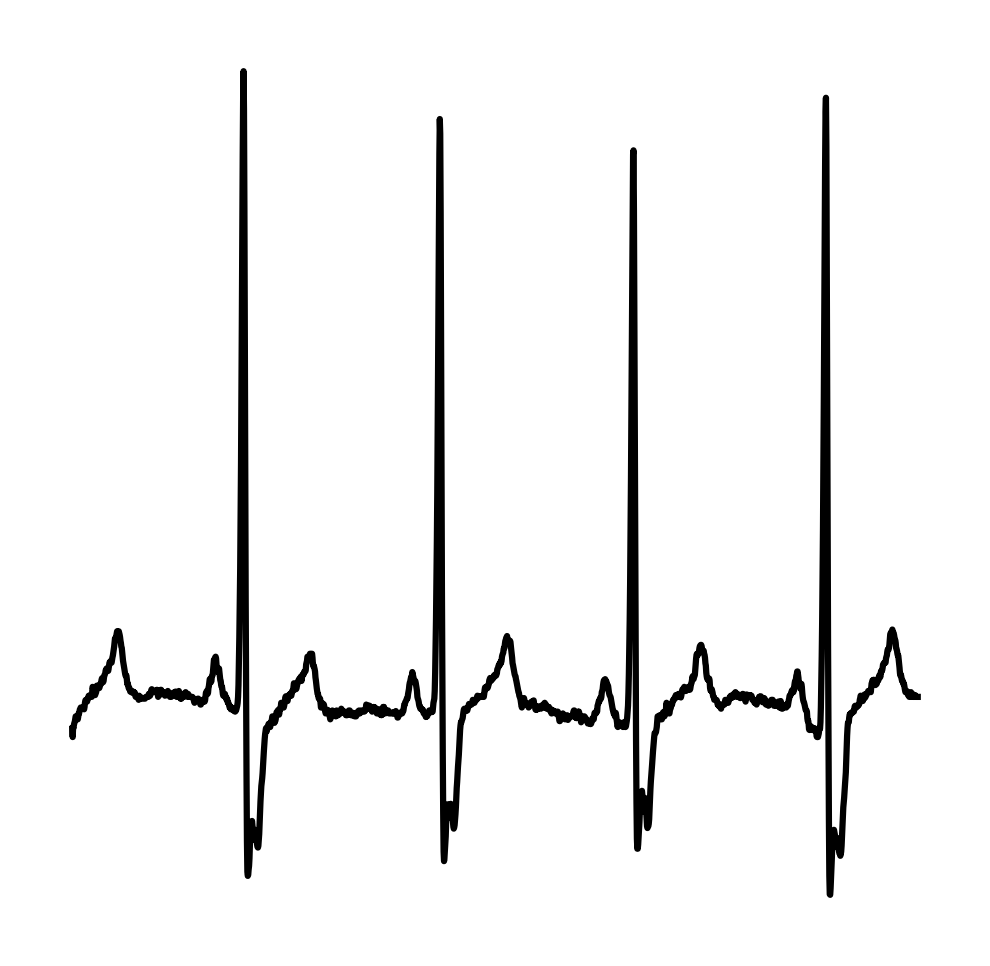

In [344]:
if __name__=="__main__":
    main()
    print("100% Complete")